## FLO Data Analysis Solution with Apache Hive
### 1. Hive Schema
Connecting hive --> beeline -u jdbc:hive2://localhost:10000

In [ ]:
beeline -u jdbc:hive2://localhost:10000

### Schema

In [ ]:
drop table test1.flo_transactions ;
create table if not exists test1.flo_transactions
(master_id string,
order_channel string,
platform_type string,
last_order_channel string,
first_order_date string,
last_order_date string,
last_order_date_online string,
last_order_date_offline string,
order_num_total_ever_online int,
order_num_total_ever_offline int,
customer_value_total_ever_offline float,
customer_value_total_ever_online float,
interested_in_categories_12 array<string>,
online_product_group_amount_top_name_12 string,
offline_product_group_name_12 string,
last_order_date_new date,
store_type string )
row format delimited
fields terminated by '|'
lines terminated by '\n'
stored as textfile
tblproperties('skip.header.line.count'='1');


## 2.Loading Data From Local

In [ ]:
LOAD DATA LOCAL INPATH '/home/train/datasets/flo100k.csv' OVERWRITE INTO TABLE test1.flo_transactions;


### Data Inpath

In [ ]:
LOAD DATA INPATH "/user/train/flo_odev/flo100k.csv" into table test1.flo_transactions;

### Stored As Orc

In [ ]:
create table test1.flo_transactions_orc stored as orc
as select
master_id,
order_channel,
platform_type,
last_order_channel,
cast(concat(substr(first_order_date, 1,10), ' ',
substr(first_order_date,12,8)) as timestamp) first_order_date,
cast(concat(substr(last_order_date, 1,10), ' ',
substr(last_order_date,12,8)) as timestamp) last_order_date,
cast(concat(substr(last_order_date_online, 1,10), ' ',
substr(last_order_date_online,12,8)) as timestamp) last_order_date_online,
cast(concat(substr(last_order_date_offline, 1,10), ' ',
substr(last_order_date_offline,12,8)) as timestamp) last_order_date_offline,
order_num_total_ever_online,
order_num_total_ever_offline,
customer_value_total_ever_offline,
customer_value_total_ever_online,
interested_in_categories_12,
online_product_group_amount_top_name_12,
offline_product_group_name_12,
last_order_date_new,
store_type
from test1.flo_transactions ;

## 3. Prepare the query that finds the number of transactions according to the store types (store_type).

In [ ]:
SELECT store_type, COUNT(1) as total_count
FROM test1.flo_transactions_orc
GROUP BY store_type
ORDER BY total_count DESC;

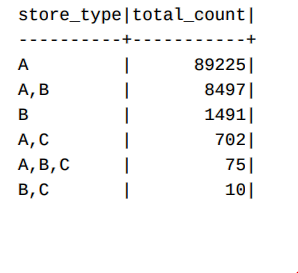

## 4.Prepare the query that finds the number of transactions according to the order channels (order_channel).

In [ ]:
SELECT order_channel, COUNT(1) as total_count
FROM test1.flo_transactions_orc
GROUP BY order_channel
ORDER BY total_count DESC;

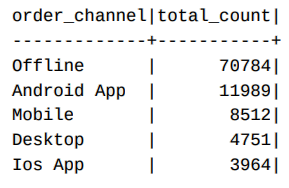

## 5.Prepare the query that finds the number of transactions based on the first order year (first_order_year).

In [ ]:
set hive.groupby.orderby.position.alias=true;
SELECT YEAR (first_order_date) AS first_order_year, COUNT(1) as total_count
FROM test1.flo_transactions_orc
GROUP BY 1
ORDER BY total_count DESC;

## 6.Prepare the query that finds the 15 customers who bring the most value in Omni-channel sales.

In [ ]:
SELECT master_id, customer_value_total_ever_offline,
customer_value_total_ever_online,
(customer_value_total_ever_offline + customer_value_total_ever_online) as
customer_value
FROM test1.flo_transactions_orc
WHERE customer_value_total_ever_offline > 0.0 AND
customer_value_total_ever_online > 0.0
ORDER BY customer_value DESC
LIMIT 15;